In [1]:
import torch
from diffusers import StableDiffusionPipeline
import os

# 'runwayml/stable-diffusion-v1-5' is a good starting point.
# For even faster (but lower quality) results, consider models specifically
# optimized for speed like SD-Turbo or LCM models, if available in a CPU-friendly format.
model_id = "runwayml/stable-diffusion-v1-5"
model_id = 'stable-diffusion-v1-5/stable-diffusion-v1-5'
model_id = 'stabilityai/stable-diffusion-2'

print(f"Loading Stable Diffusion model: {model_id} to CPU...")
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe.to("cpu")
print("Model loaded successfully to CPU.")

2025-07-21 21:13:14.400928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753132394.667522      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753132394.744041      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading Stable Diffusion model: stabilityai/stable-diffusion-2 to CPU...


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Model loaded successfully to CPU.


In [2]:
prompt = "A photo-realistic woman, standing, full body, facing the viewer, with a subtle smile on her face."

Generating image for prompt: 'A photo-realistic woman, standing, full body, facing the viewer, with a subtle smile on her face.'...


  0%|          | 0/30 [00:00<?, ?it/s]

Generation complete!


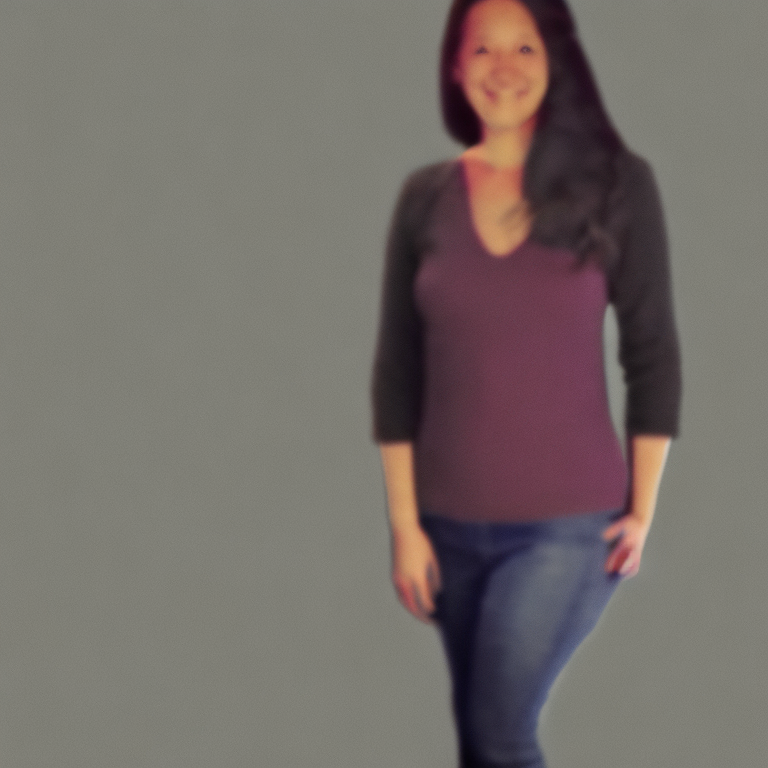

In [3]:
print(f"Generating image for prompt: '{prompt}'...")
num_inference_steps = 30
guidance_scale = 7.5 # Controls how much the prompt influences the generation

image = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale
).images[0]

print("Generation complete!")
image